In [1]:
import pandas as pd 
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
import warnings


from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image#, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow 



#import scipy
#print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))


# Set the seed value for experiment reproduci.bility.
seed = 1842
tensorflow.random.set_seed(seed)
np.random.seed(seed)
# Turn off warnings for cleaner looking notebook
warnings.simplefilter('ignore')

In [2]:
#define image dataset 
#why do we rescale?
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2) #shear_range =.25, zoom_range =.2, horizontal_flip = True, rotation_range=20)     


train_dataset = image_generator.flow_from_directory(directory='train',
                                                 target_size=(224,224), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(directory='train',
                                                 target_size=(224,224), 
                                                 subset="validation",
                                                 class_mode='categorical')

image_generator_submission = ImageDataGenerator(rescale=1/255) 
submission = image_generator_submission.flow_from_directory(
                                                 directory='test',
                                                 target_size=(224,224), 
                                                 class_mode=None)

Found 179 images belonging to 5 classes.
Found 42 images belonging to 5 classes.
Found 221 images belonging to 5 classes.


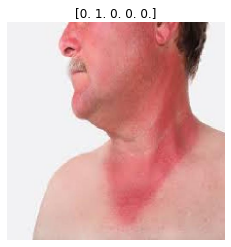

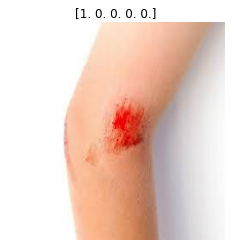

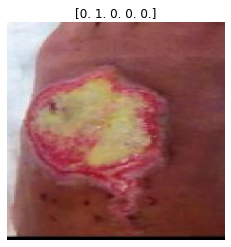

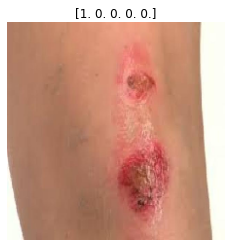

In [3]:
batch_1_img = train_dataset[0]
for i in range(0,4):
    img = batch_1_img[0][i]
    lab = batch_1_img[1][i]
    plt.imshow(img)
    plt.title(lab)
    plt.axis('off')
    plt.show()  

# CNN

In [4]:
#experiment with Convolutional neural net
model = keras.models.Sequential([
keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape = [224,224,3]),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(32, (2, 2), activation='relu'),
keras.layers.MaxPooling2D(),

keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),

keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.2),

keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.2),

keras.layers.Flatten(),

keras.layers.Dense(512, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.7),

keras.layers.Dense(128, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.5),

keras.layers.Dense(64, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.3),

keras.layers.Dense(5, activation ='softmax')])

In [5]:
model.compile(
        optimizer='adam',
        loss=tensorflow.losses.CategoricalCrossentropy(),
        metrics=[keras.metrics.AUC(name='auc')]
    )

In [6]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

checkpoint_cb = keras.callbacks.ModelCheckpoint("cnnfive.h5",
                                                    save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

In [7]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler],
    epochs=1
)

6/6 [==============================] - 5s 710ms/step - loss: 2.1998 - auc: 0.5409 - val_loss: 1.9057 - val_auc: 0.5585


In [8]:
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

2/2 [==============================] - 0s 50ms/step - loss: 1.9057 - auc: 0.5585
Loss:  1.90567147731781
Accuracy:  0.5584608912467957


In [9]:
# Generate batch and labels

train_images, train_labels = next(train_dataset)

In [10]:
train_labels

array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

# VGG19

In [15]:
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(5, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
modelvgg.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)

In [17]:
modelvgg.fit(train_dataset, epochs=10, validation_data=validation_dataset, callbacks=callback)

Epoch 1/10
6/6 [==============================] - 29s 5s/step - loss: 2.4289 - auc: 0.5509 - val_loss: 2.1451 - val_auc: 0.6342
Epoch 2/10
6/6 [==============================] - 33s 6s/step - loss: 1.2898 - auc: 0.8199 - val_loss: 1.5561 - val_auc: 0.7035
Epoch 3/10
6/6 [==============================] - 32s 5s/step - loss: 0.7609 - auc: 0.9266 - val_loss: 1.5807 - val_auc: 0.7613
Epoch 4/10
6/6 [==============================] - 32s 5s/step - loss: 0.4931 - auc: 0.9705 - val_loss: 1.2922 - val_auc: 0.7980
Epoch 5/10
6/6 [==============================] - 32s 5s/step - loss: 0.2742 - auc: 0.9954 - val_loss: 1.2759 - val_auc: 0.8211
Epoch 6/10
6/6 [==============================] - 32s 6s/step - loss: 0.2331 - auc: 0.9953 - val_loss: 1.1708 - val_auc: 0.8420
Epoch 7/10
6/6 [==============================] - 32s 5s/step - loss: 0.1421 - auc: 0.9997 - val_loss: 1.1904 - val_auc: 0.8350
Epoch 8/10
6/6 [==============================] - 34s 6s/step - loss: 0.1234 - auc: 0.9996 - val_loss: 1

In [18]:
modelvgg.save("wound_vgg19five.h5")

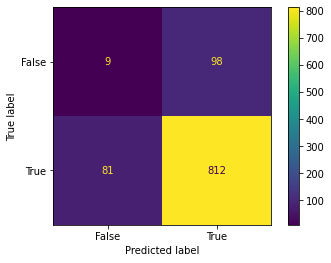

In [19]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [20]:
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
F1_score = metrics.f1_score(actual, predicted)

In [21]:
print({"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"F1_score":F1_score})

{'Precision': 0.8923076923076924, 'Sensitivity_recall': 0.9092945128779395, 'F1_score': 0.9007210205213533}


# 

# 